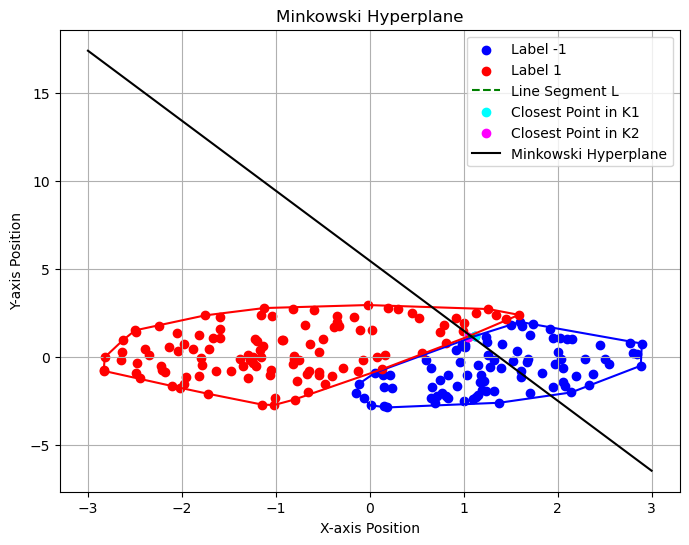

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, distance

# Load the CSV file
file_path = 'input.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate points by label
class_minus_one = data[data.iloc[:, 2] == -1].iloc[:, [0, 1]].values
class_one = data[data.iloc[:, 2] == 1].iloc[:, [0, 1]].values

# Compute convex hulls
hull_minus_one = ConvexHull(class_minus_one)
hull_one = ConvexHull(class_one)

# Extract hull vertices
vertices_minus_one = class_minus_one[hull_minus_one.vertices]
vertices_one = class_one[hull_one.vertices]

# Find the closest pair of points between the convex hulls
min_dist = float('inf')
point_K1 = None
point_K2 = None

for p1 in vertices_minus_one:
    for p2 in vertices_one:
        dist = distance.euclidean(p1, p2)
        if dist < min_dist:
            min_dist = dist
            point_K1 = p1
            point_K2 = p2

# Compute the Minkowski hyperplane
midpoint = (point_K1 + point_K2) / 2
direction_vector = point_K2 - point_K1
normal_vector = np.array([-direction_vector[1], direction_vector[0]])  # Orthogonal vector

# Define the hyperplane line
x_vals = np.linspace(-3, 3, 100)  # Adjust range as needed
y_vals = midpoint[1] + (normal_vector[1] / normal_vector[0]) * (x_vals - midpoint[0])

# Plot the points, convex hulls, closest points, and hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(class_minus_one[:, 0], class_minus_one[:, 1], color='blue', label='Label -1')
plt.scatter(class_one[:, 0], class_one[:, 1], color='red', label='Label 1')

# Plot convex hulls
for simplex in hull_minus_one.simplices:
    plt.plot(class_minus_one[simplex, 0], class_minus_one[simplex, 1], 'b-')
for simplex in hull_one.simplices:
    plt.plot(class_one[simplex, 0], class_one[simplex, 1], 'r-')

# Plot closest points
plt.plot([point_K1[0], point_K2[0]], [point_K1[1], point_K2[1]], 'g--', label='Line Segment L')
plt.scatter(*point_K1, color='cyan', label='Closest Point in K1')
plt.scatter(*point_K2, color='magenta', label='Closest Point in K2')

# Plot hyperplane
plt.plot(x_vals, y_vals, 'k-', label='Minkowski Hyperplane')

# Add labels and legend
plt.xlabel('X-axis Position')
plt.ylabel('Y-axis Position')
plt.title('Minkowski Hyperplane')
plt.legend()
plt.grid(True)

plt.show()
